In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2008-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 131, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-01 1998-03-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980201 19980301 19980401 ... 20081101 20081201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 44, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2008-09-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20080801 20080901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(lon=slice(0,100),lat=slice(0,50))
#jjas_data

In [8]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:  (time: 44, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2008-09-01
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20080801 20080901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float64 0.4308 0.3221 0.2765 ... 0.1546 0.1725
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[0.41169896, 0.4162719 , 0.42498837, ..., 0.90354562, 0.86019864,
        0.62904522],
       [0.40099814, 0.41317001, 0.42096477, ..., 0.81703515, 0.8430232 ,
        0.66129965],
       [0.40974662, 0.42470233, 0.43301917, ..., 0.74895285, 0.61735615,
        0.6201029 ],
       ...,
       [0.30530888, 0.2881662 , 0.27591417, ..., 0.31848547, 0.33443026,
        0.38756255],
       [0.31809422, 0.28972163, 0.25372516, ..., 0.299688  , 0.30656547,
        0.32876451],
       [0.28422865, 0.24842506, 0.2023861 , ..., 0.30493225, 0.32380772,
        0.31599506]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean*24

trmm = pr_mm

In [11]:
#opening miroc5 data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MIROC5/pr_Amon_MIROC5_historical_r1i1p1_185001-201212.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1956, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2012-12-16 12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [12]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_27645/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1956, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2012-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2013-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [13]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2008-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 131, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T12:00:00 ... 2008-11-16
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-01-01 00:00:00 ... 2008-12-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [14]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 44, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2008-09-16
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-06-01 00:00:00 ... 2008-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [15]:
#jjas_data.x.values
#jjas_data.y.values


In [16]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(1000000.,5275000.),y=slice(2000000.,4175000.))
#jjas_data

In [17]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 44, bnds: 2, lat: 40, lon: 32)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2008-09-16
  * lon        (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-06-01 00:00:00 ... 2008-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 17.43 18.83 17.68 19.08 ... 28.33 27.18 28.58
    lon_bnds   (lon, bnds) float64 85.42 86.83 85.67 87.08 ... 94.33 93.17 94.58
    pr         (time, lat, lon) float64 0.00012 0.0001201 ... 0.0001431
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [18]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[0.00015584, 0.00015626, 0.00015669, ..., 0.00021332, 0.00020959,
        0.00020586],
       [0.00015786, 0.0001584 , 0.00015894, ..., 0.00021727, 0.00021108,
        0.00020489],
       [0.00015988, 0.00016054, 0.00016119, ..., 0.00022122, 0.00021257,
        0.00020391],
       ...,
       [0.00024441, 0.00024807, 0.00025174, ..., 0.00019065, 0.00019468,
        0.00019872],
       [0.0002229 , 0.0002253 , 0.00022769, ..., 0.00018394, 0.00018814,
        0.00019233],
       [0.0002014 , 0.00020252, 0.00020363, ..., 0.00017723, 0.00018159,
        0.00018594]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [19]:
miroc = jjas_mean*86400
miroc

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[13.46470309, 13.50127844, 13.53785378, ..., 18.43111881,
        18.10875503, 17.78639125],
       [13.63898369, 13.68575211, 13.73252052, ..., 18.77241062,
        18.23735872, 17.70230683],
       [13.81326429, 13.87022578, 13.92718727, ..., 19.11370242,
        18.36596242, 17.61822241],
       ...,
       [21.11677562, 21.43351963, 21.75026364, ..., 16.47208302,
        16.82064783, 17.16921263],
       [19.25896326, 19.46554715, 19.67213103, ..., 15.89257423,
        16.25498179, 16.61738935],
       [17.40115091, 17.49757467, 17.59399842, ..., 15.31306543,
        15.68931575, 16.06556606]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [20]:
bias = miroc - trmm
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[ 3.58392798,  3.51075279,  3.33813284, ..., -3.25397602,
        -2.53601226,  2.68930595],
       [ 4.01502829,  3.76967185,  3.62936614, ..., -0.83643289,
        -1.99519803,  1.83111521],
       [ 3.97934544,  3.67736987,  3.53472713, ...,  1.13883395,
         3.5494149 ,  2.73575277],
       ...,
       [13.78936251, 14.51753072, 15.12832366, ...,  8.8284318 ,
         8.79432168,  7.86771152],
       [11.62470204, 12.51222808, 13.58272711, ...,  8.70006233,
         8.89741039,  8.72704102],
       [10.57966325, 11.53537321, 12.73673207, ...,  7.99469152,
         7.91793041,  8.48168466]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [21]:
bias_percentage = ((miroc - trmm)/trmm)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[ 36.27172905,  35.14082163,  32.72768799, ..., -15.00558814,
        -12.28404383,  17.81341163],
       [ 41.71910742,  38.01574566,  35.9230989 , ...,  -4.26559011,
         -9.86132425,  11.53735178],
       [ 40.46551026,  36.07791478,  34.01241935, ...,   6.33570117,
         23.95574875,  18.38238434],
       ...,
       [188.1886869 , 209.91257943, 228.45757733, ..., 115.50019139,
        109.56845667,  84.58539559],
       [152.27016354, 179.94612298, 223.05511824, ..., 120.95999919,
        120.92863133, 110.60400208],
       [155.09319617, 193.47506609, 262.22016958, ..., 109.24136449,
        101.88570071, 111.83830827]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

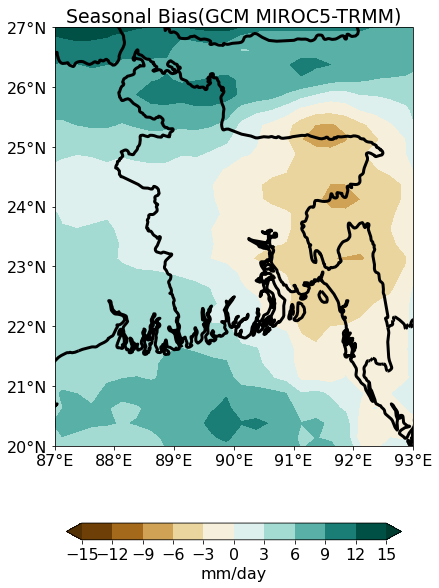

In [28]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, ticks=np.arange(-15,15+3,3),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)




plt.title('Seasonal Bias(GCM MIROC5-TRMM)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(gcm miroc-trmm).png")



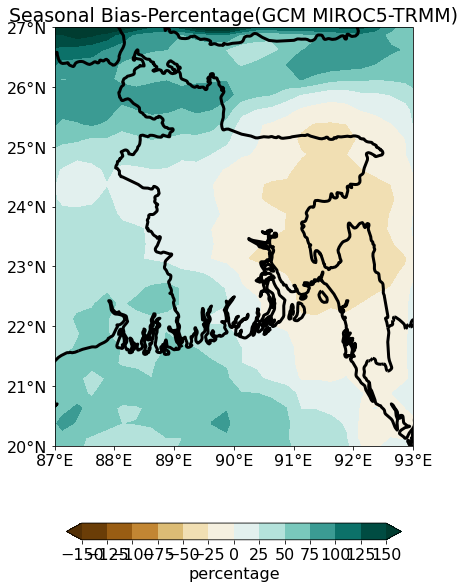

In [27]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25), transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(GCM MIROC5-TRMM)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(gcm miroc5-trmm).png")







In [24]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r